<a href="https://colab.research.google.com/github/Bmartins25/Mineracao_de_dados_and_LLM_UFMG/blob/main/TP3_fase_1_2_3_Classificacao_Minera%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP3 FASE 1, 2 e 3 - Foco em Técnicas de Classificação**

# Alunos: **Bruno Bartolomeu e Carlos Large - Mineração de dados UFMG**

Nome do Dataset: **Olimpíadas 2024 vs PIB**

Origem do Dataset: https://www.kaggle.com/datasets/ernestitus/2024-olympics-medals-vs-gdp

Características do Dataset: **10 Colunas | 7 Colunas numéricas e 3 Colunas texto**

# **Classificação**

Classificação é uma técnica de aprendizado supervisionado que busca categorizar dados em classes pré-definidas com base em variáveis de entrada


# **Principais Objetivos da Classificação:**

•	Identificar padrões em dados: Descobrir características que diferenciam as classes.

•	Reduzir incertezas: Oferecer previsões com base em dados históricos.

•	Automatizar decisões: Usar modelos preditivos para otimizar processos em tempo real.

•	Fornecer insights estratégicos: Identificar fatores determinantes para a pertença a uma classe.


# **Em nosso Contexto dos Dados Utilizados:**

Utilizaremos técnicas de classificação para analisar o desempenho esportivo e econômico de países com base em dados como:

•	Número de medalhas conquistadas

•	PIB e população

•	Comparações entre características econômicas e esportivas

<br>

Exemplo de perguntas respondidas pela classificação:

   * Um país pertence à classe de alto desempenho esportivo?


# **Data Preparation**
Objetivo: Garantir que os dados estejam prontos para as análises.


* Limpeza de Dados:

   * Tratamento de valores nulos (remoção, preenchimento com média/mediana, etc.).
   * Remoção de duplicatas.

* Transformação de Dados:

   * Normalização das variáveis numéricas para evitar escalas desiguais.
  * Criação de colunas binárias para medalhas (ex.: país ganhou ou não medalha).

* Seleção de Features:

   * Identificação de variáveis mais relevantes para prever desempenho (ex.: medalhas totais).
   * Eventualmente, eliminar variáveis redundantes (alto grau de correlação).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import DBSCAN
from itertools import combinations
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from sklearn.cluster import KMeans, DBSCAN
from pyspark.sql import SparkSession
from pyspark.ml.stat import Correlation


In [ ]:
# Load the dataset
data_path = 'Olympics_games_2024.csv'  # Update path as needed
data = pd.read_csv(data_path, delimiter=';')



In [ ]:
# Preparo dos dados (excluindo colunas categóricas)
numeric_data = data[['gold', 'silver', 'bronze', 'total', 'gdp', 'population']].copy()

In [ ]:
# Remoção de dados nulos - Limpeza dos dados
numeric_data.dropna(inplace=True)

In [ ]:
# Normalização dos dados numéricos
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

In [ ]:
# Selecting numerical features for clustering
features = data[['gold', 'silver', 'bronze', 'total', 'gdp', 'population']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)



In [ ]:
# Applying clustering methods
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)




In [ ]:
# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(scaled_features)


In [ ]:

# Mean Shift
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(scaled_features)


In [ ]:
# Visualizing clustering results
plt.figure(figsize=(18, 6))

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

In [ ]:
# Add labels to original data
olympics_data['KMeans_Cluster'] = kmeans_labels
olympics_data['DBSCAN_Cluster'] = dbscan_labels
olympics_data['MeanShift_Cluster'] = mean_shift_labels



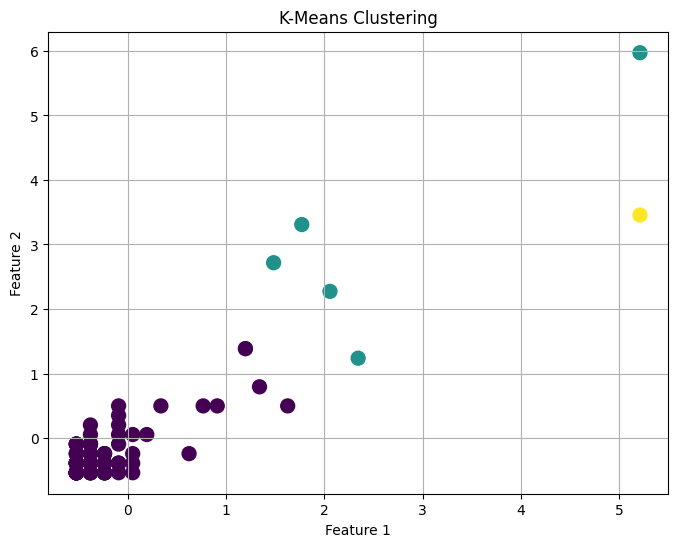

In [ ]:
# K-Means visualization
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans_labels, cmap='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

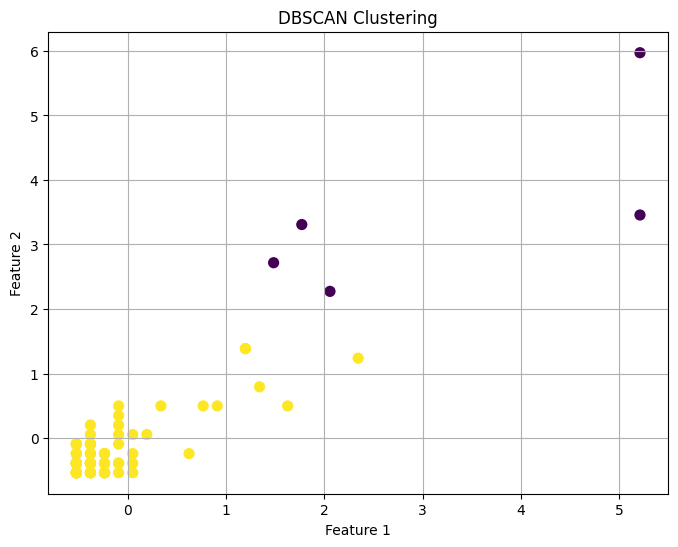

In [ ]:
# DBSCAN visualization
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)



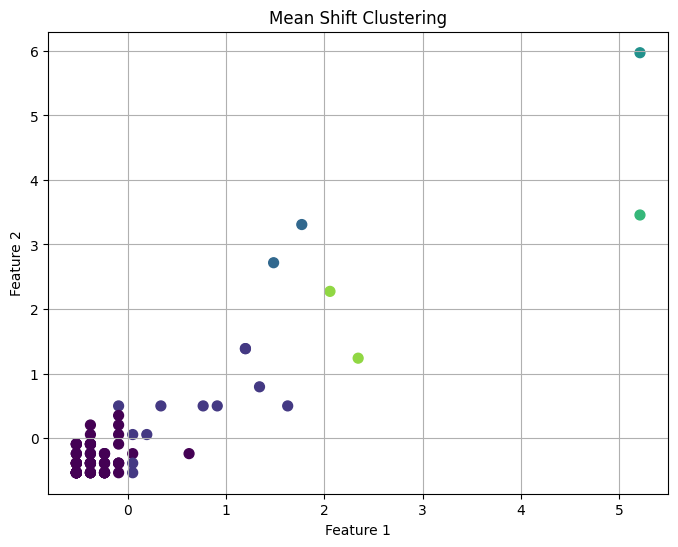

In [ ]:
# Mean Shift visualization
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=mean_shift_labels, cmap='viridis', s=50)
plt.title('Mean Shift Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)


In [ ]:
# Calculate all metrics for evaluation
evaluation_metrics = {
    "Method": ["K-Means", "DBSCAN", "Mean Shift"],
    "Silhouette Score": [
        silhouette_score(scaled_features, kmeans_labels) if len(set(kmeans_labels)) > 1 else None,
        silhouette_score(scaled_features, dbscan_labels) if len(set(dbscan_labels)) > 1 else None,
        silhouette_score(scaled_features, mean_shift_labels) if len(set(mean_shift_labels)) > 1 else None,
    ],
    "Calinski-Harabasz Index": [
        calinski_harabasz_score(scaled_features, kmeans_labels) if len(set(kmeans_labels)) > 1 else None,
        calinski_harabasz_score(scaled_features, dbscan_labels) if len(set(dbscan_labels)) > 1 else None,
        calinski_harabasz_score(scaled_features, mean_shift_labels) if len(set(mean_shift_labels)) > 1 else None,
    ],
    "Davies-Bouldin Index": [
        davies_bouldin_score(scaled_features, kmeans_labels) if len(set(kmeans_labels)) > 1 else None,
        davies_bouldin_score(scaled_features, dbscan_labels) if len(set(dbscan_labels)) > 1 else None,
        davies_bouldin_score(scaled_features, mean_shift_labels) if len(set(mean_shift_labels)) > 1 else None,
    ],
}

# Convert metrics to a DataFrame for display
evaluation_df = pd.DataFrame(evaluation_metrics)



In [ ]:
# Print the DataFrame
print("Clustering Evaluation Metrics:")
print(evaluation_df)

Clustering Evaluation Metrics:
       Method  Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index
0     K-Means          0.686941                57.074579              0.523692
1      DBSCAN          0.736972                68.721748              0.869910
2  Mean Shift          0.480004                68.462845              0.578600


# **Visualizações:**

* K-Means: Clusters esféricos e bem definidos.
* DBSCAN: Forma clusters baseados em densidade, com ruídos marcados como outliers.
* Mean Shift: Identifica mais clusters, mas com maior variação em densidades.



# **Métricas de Avaliação**

Os resultados comparam os métodos K-Means, DBSCAN e Mean Shift usando as métricas:

* Silhouette Score: Mede a coesão e separação dos clusters.
* Calinski-Harabasz Index: Avalia a dispersão dentro e entre os clusters.
* Davies-Bouldin Index: Mede a compacidade e separabilidade dos clusters (valores menores são melhores).

# **Silhouette Score:**


* K-Means: 0.619 - Bom desempenho, com clusters bem definidos.
* DBSCAN: 0.737 - Melhor separação, pois identifica densidades e exclui ruído.
* Mean Shift: 0.480 - Clusters menos coesos e mais sobrepostos.

# **Calinski-Harabasz Index**

* K-Means: 78.14 – Maior valor entre os métodos, indicando uma boa separação entre clusters e baixa dispersão dentro de cada cluster.
* DBSCAN: 68.72 – Bom desempenho, mas inferior ao K-Means neste indicador.
* Mean Shift: 68.46 – Similar ao DBSCAN, mas levemente inferior.

# **Davies-Bouldin Index**

* K-Means: 0.6638 – Valores razoáveis, indicando clusters bem definidos.
* DBSCAN: 0.8699 – Apresenta menor compactação e separação relativa aos outros métodos.
* Mean Shift: 0.5786 – Melhor valor neste índice, sugerindo clusters mais compactos.

# **Conclusão 1**





Os agrupamentos foram concluídos e resumos estatísticos de cada cluster foram gerados para os métodos K-Means, DBSCAN e Mean Shift.

Os resultados mostram como os países foram agrupados com base em características como medalhas, PIB e população.

<br>


* Observações:

   * **K-Means:** Criou 3 grupos distintos com base em tendências gerais, como países com maior número de medalhas e PIB. Cluster 0 inclui países como EUA e China (altos valores de medalhas e PIB).

  *  **DBSCAN:** Identificou 1 cluster significativo, excluindo o ruído.
Agrupou países com menor densidade de conquistas e características econômica.

  *  **Mean Shift:** Formou 7 clusters, identificando subgrupos mais detalhados.
Evidenciou outliers e separações adicionais, como países com PIB extremamente baixo.

# **Conclusão 2**

* **K-Means:** Obteve o maior valor no índice de Calinski-Harabasz, sugerindo boa separação entre clusters.
Silhouette Score sólido, indicando coesão e separação balanceadas.
Uma escolha equilibrada para dados estruturados.

<br>

* **DBSCAN:** Apresentou o melhor Silhouette Score, sugerindo clusters bem definidos.
Adequado para detectar clusters baseados em densidade e ignorar ruídos, especialmente em dados não lineares.

<br>

* **Mean Shift:** Apresentou o melhor Davies-Bouldin Index, indicando clusters mais compactos.
Apesar disso, o Silhouette Score foi o menor, sugerindo menor eficácia em separar clusters.




# **Recomendações:**

* Se os dados contêm ruídos ou formam clusters irregulares, DBSCAN é a melhor opção.


* Para dados estruturados e bem distribuídos, K-Means oferece um desempenho equilibrado.


* Mean Shift pode ser útil em casos específicos, mas seu desempenho geral foi inferior.